In [7]:
from utils import *

In [2]:

# Main analysis
print("Loading course data...")
course_data = load_course_data()
print(f"Loaded data for years: {list(course_data.keys())}")


Loading course data...
Loaded data for years: ['2022', '2023', '2024', '2025']


Found 92 courses for 2022
Loading student preferences...
Loaded preferences data with shape: (116, 30)


c:\src\personal_projects\discover_analysis\utils.py:139: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='name', data=top_courses, ax=ax1, palette='viridis')
c:\src\personal_projects\discover_analysis\utils.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='name', data=bottom_courses, ax=ax2, palette='viridis')


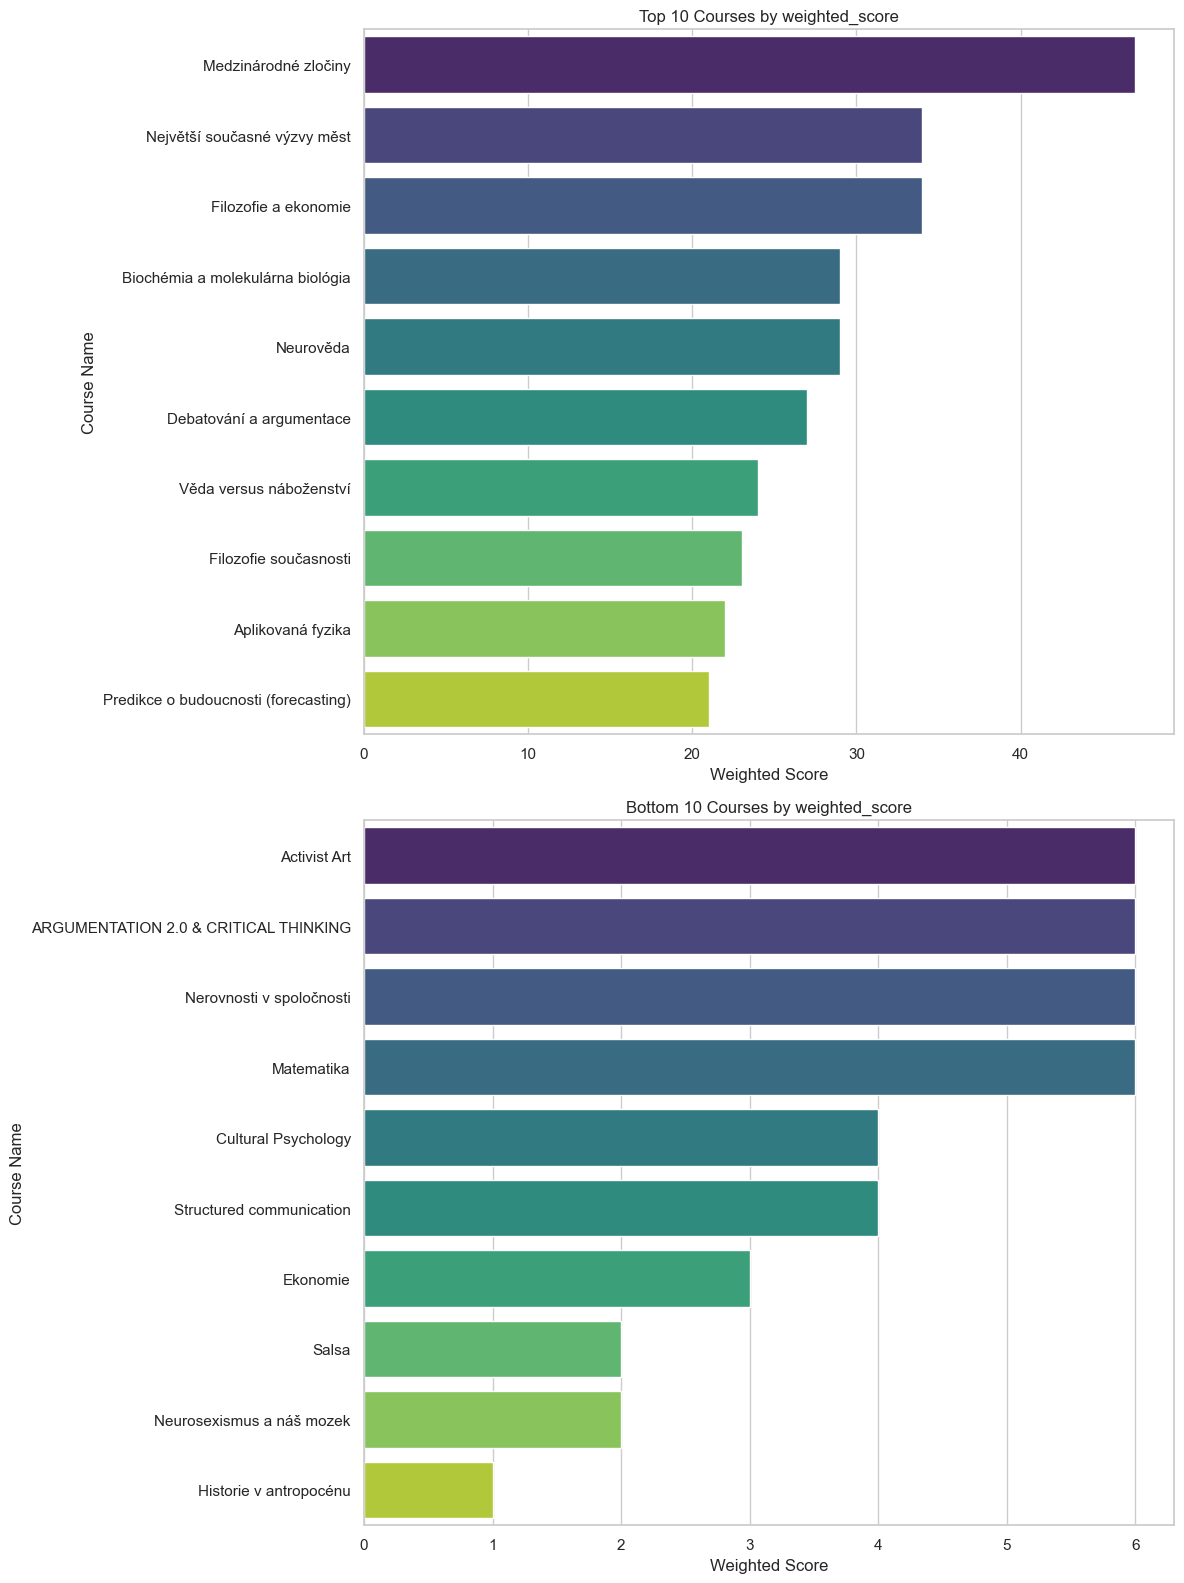

In [19]:
year = '2022'
courses_year = course_data.get(year)

if courses_year is not None:
    print(f"Found {len(courses_year)} courses for {year}")

    # Now load preferences
    print("Loading student preferences...")
    preferences_df = load_student_preferences()
    print(f"Loaded preferences data with shape: {preferences_df.shape}")

    # display(preferences_df.head())
    popularity_df = analyze_course_popularity(preferences_df, courses_year)

    plot_course_popularity(popularity_df)

  

In [14]:
def save_popularity_data(popularity_df, year=None, output_dir=None):
    """
    Sorts the popularity DataFrame by weighted score and saves it to a CSV file.
    
    Parameters:
    - popularity_df: DataFrame containing course popularity metrics
    - year: String or int representing the year for the filename (optional)
    - output_dir: Directory to save the file (optional, default is current directory)
    
    Returns:
    - Path to the saved CSV file
    """
    if popularity_df.empty:
        print("Warning: Empty popularity DataFrame, nothing to save.")
        return None
    
    # Sort by weighted score (popularity) in descending order
    sorted_df = popularity_df.sort_values('weighted_score', ascending=False)
    
    # Create output directory if specified and doesn't exist
    if output_dir:
        from pathlib import Path
        output_path = Path(output_dir)
        output_path.mkdir(exist_ok=True, parents=True)
    else:
        output_path = Path('.')
    
    # Create filename
    year_suffix = f"_{year}" if year else ""
    filename = f"course_popularity_analysis{year_suffix}.csv"
    filepath = output_path / filename
    
    # Save to CSV
    sorted_df.to_csv(filepath, index=False)
    print(f"Popularity data saved to {filepath}")

In [20]:
popularity_df = popularity_df.drop(columns=['avg_pref'])

In [21]:
# from utils import save_popularity_data
save_popularity_data(popularity_df, year, 'data')

Popularity data saved to data\course_popularity_analysis_2022.csv
